## Supervised Learning 1: Linear Regression

In this lecture, we will dive into linear regression using a practical example of predicting house prices.

Linear regression is a foundational model in machine learning, widely used for predicting continuous values based on a linear relationship. In our dataset, we’ll examine house prices, focusing on two variables: size (in m²) and price (in thousands of dollars).

In the next lesson, we will extend this example, by using additional features to predict house prices.

### Table of Contents

1. [Data Loading and Exploration](#data-loading)
2. [Data Vizualization](#Data-Visualization)
3. [Linear Regression Model](#linear-regression-model)
3. [Cost Function and Model Fit](#cost-function-and-model-fit)
<!--     - [Cost Function Definition](#cost-function-definition) -->
<!--     - [Cost Function Intuition](#cost-function-intuition) -->
4. [Gradient Descent Algorithm](#gradient-descent-algorithm)
5. [Learning Curves and Model Convergence](#learning-curves-and-model-convergence)
6. [Making Predictions](#making-predictions)
7. [Model Evaluation](#model-evaluation)
8. [Normal Equation for Univariate Linear Regression](#normal-equation-for-univariate-linear-regression)

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Loading and Exploration <a id="data-loading">
    

We will use two datasets: a training dataset and a validation dataset. The training dataset is used to train the linear regression model, allowing it to learn the relationship between house size and price. The validation dataset, which contains unseen data, will be used to evaluate the model’s performance and test how well it generalizes to new, unseen data.

**Note:  to run following notebook, either download whole lecture theory directory locally (preserving data and images subfolder structure) or manually upload datasets to google colab from the drive according to required path**

In [2]:
train_df = pd.read_csv('csv/house_prices_univariate_train.csv') # Load training dataset
val_df = pd.read_csv('csv/house_prices_univariate_val.csv') # Load validation dataset

In [3]:
train_df.head()

,size,price
0,106.181018,91.038609
1,192.607146,176.848212
2,159.799091,141.596379
3,139.798773,103.384703
4,73.402796,85.899299


In [4]:
# Display entry counts and check for missing values

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    100 non-null    float64
 1   price   100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [5]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    50 non-null     float64
 1   price   50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes


**Observations**:

The training dataset consists of 100 entries with no missing values, while the validation dataset contains 50 entries.

Both *size* and *price* columns are numeric (float64), which is suitable for applying linear regression model.

*For now, we'll focus solely on the training data and set aside the validation dataset. We'll train the model using the training data, and after the model is trained, we will use the validation dataset to evaluate its performance and measure accuracy.*

In [6]:
train_df.describe()

,size,price
count,100.000000,100.000000
mean,120.527112,109.356234
std,44.623412,43.588474
min,50.828318,30.919275
25%,78.980114,70.613250
50%,119.621368,108.536825
75%,159.530468,142.090371
max,198.033040,213.411167


**Observations**:

In the training data, *size* values range from 50 m² to roughly 200 m², while the price values are between 30K\\$ and  213.4K\\$.

## Data Visualization <a id="Data-Visualization">

Let's visualize the relationship between house size and price

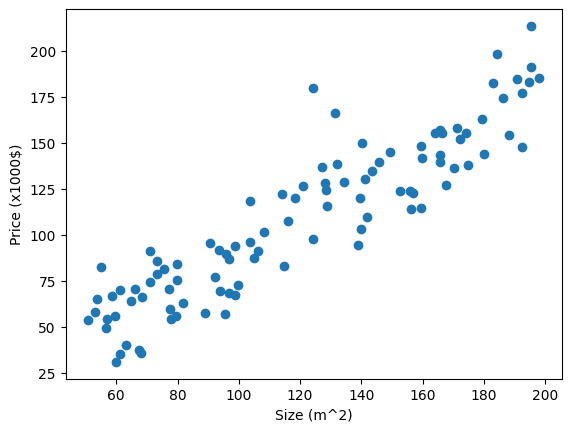

In [7]:
plt.scatter(train_df['size'], train_df['price'])
plt.xlabel('Size (m^2)')
plt.ylabel('Price (x1000$)')
plt.show()

The scatter plot shows a positive linear relationship between house size and price, indicating that as the size increases, the price tends to increase as well.

This pattern suggests that linear regression may be a suitable model for predicting price based on size.

## Linear Regression Model <a id="linear-regression-model">

The linear regression model maps the input variable $x$ to the output $y$ using the following equation:

$$
f_{w, b}(x) = w \cdot x + b
$$

This formula defines a straight line, where different values of $w$ (slope of the line) and $b$ (the intercept) determine the line's position and angle on the plot.

Now, let's implement the function that, given the parameters of the line ($w$ and $b$) and an $x$ value (house size), predicts $y$ (house price)

In [8]:
def predict(x, w, b):
    """
    Predict the output value (house price) given the input (house size), slope (w), and intercept (b) of the linear regression line.

    Args:
        x (float): The input value representing the house size.
        w (float): The slope of the linear regression line.
        b (float): The intercept of the linear regression line.

    Returns:
        float: The predicted output value (price) based on the linear model.
    """
    return w * x + b

To build intuition for how *w* and *b* shape the line, let’s explore some examples through code, starting with *w = 2* and *b = -150*


Text(0, 0.5, 'Price')

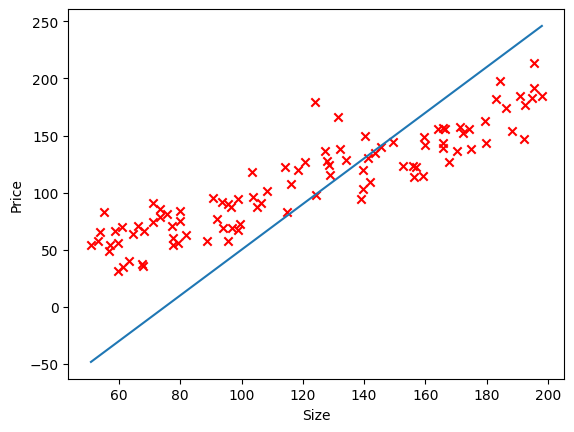

In [9]:
# define line parameters
w = 2
b = -150

# Define segment boundaries (for drawing the line) - range of `house size` values
x1 = train_df['size'].min()
x2 = train_df['size'].max()

# Predict y values for the boundaries, given line parameters w and b
y1 = predict(x1, w, b)
y2 = predict(x2, w, b)

# Create scatter plot for actual data points
plt.scatter(train_df['size'], train_df['price'], color='red', marker='x')
# Plot the linear regression line
plt.plot([x1, x2], [y1, y2])
plt.xlabel("Size")
plt.ylabel("Price")

Let's represent another line with *w = 0* and *b = 100*

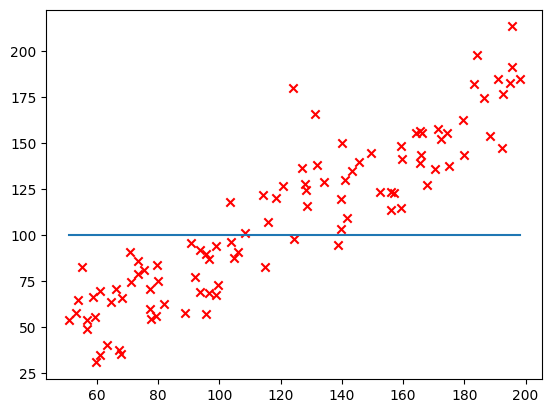

In [10]:
w = 0
b = 100

x1 = train_df['size'].min()
x2 = train_df['size'].max()

y1 = predict(x1, w, b)
y2 = predict(x2, w, b)

plt.scatter(train_df['size'], train_df['price'], color='red', marker='x')
plt.plot([x1, x2], [y1, y2])

The parameters $w$ and $b$ determine how well the line fits the data.
The goal of training a linear regression model is to find the parameters $w$ and $b$ that best fit the data. To evaluate how well a given line represents the data, we define a function called the **Cost Function**. This function measures the error between the predicted and actual values, helping us quantify how well the model aligns with the data.

## Cost Function and Model Fit <a id="cost-function-and-model-fit">

Given a prediction line, we need to assess how good it fits the data. Let's visualize for each point from our data, the difference between the predicted value (value from the line) and actual house price. First, we will use a simple horizontal prediction line for illustration.

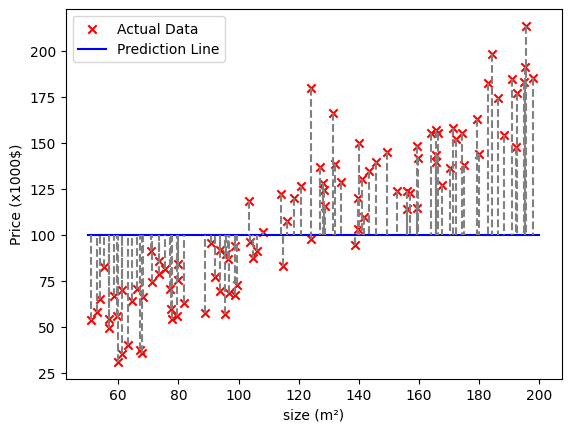

In [11]:
# define line parameters
w = 0
b = 100

# Define segment boundaries (for drawing the line)
x1 = 50
x2 = 200

y1 = predict(x1, w, b)
y2 = predict(x2, w, b)

# Scatter plot of the actual data points
plt.scatter(train_df['size'], train_df['price'], color='red', marker='x', label='Actual Data')

# Plot of the prediction line
plt.plot([x1, x2], [y1, y2], color='blue', label='Prediction Line')

# Adding error lines for each data point
for i in range(len(train_df)):
    x = train_df['size'].iloc[i]
    y_actual = train_df['price'].iloc[i]
    y_pred = predict(x, w, b)
    plt.plot([x, x], [y_actual, y_pred], color='gray', linestyle='--')  # Error line

# Adding labels and legend
plt.xlabel('size (m²)')
plt.ylabel('Price (x1000$)')
plt.legend()
plt.show()


Each gray dashed line above represents the error for an individual data point. This error is measured as the difference between the predicted value, $f_{w,b}(x^{(i)})$, and the actual value, $y^{(i)}$. Specifically:

- If the point is below the prediction line, the error is negative.
- If the point is above the prediction line, the error is positive.

To ensure all errors are treated equally regardless of direction, we square each error, eliminating the sign. Squaring not only removes the sign but also increases the impact of larger errors, making them more significant in the total cost. After squaring, we sum the squared errors across all data points. Finally, we average the squared errors by dividing the sum by the total number of data points, which helps provide a consistent measure of the model's overall performance across the entire dataset.

### Cost Function Definition<a id="cost-function-definition">

The cost function *J(w,b)* for linear regression with one variable is given by the following formula:

  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $y^{(i)}$ is the actual house price $i$'th training example
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction (see explanation above for why we square the difference)
- These differences are summed over all the $m$ training examples and divided by `2m` to produce the cost, $J(w,b)$.  

The **sigma symbol (∑)** is a mathematical shorthand for summing over all the examples in the dataset. Specifically, the expression:

$$
\sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}
$$

means that we sum the squared differences for each example from out data, from $i = 0$ to $i = m-1$, where *m* is the total number of examples in the dataset. This allows us to account for the error across all data points.

These differences are then averaged by dividing by $2m$ to compute the cost, $J(w,b)$.

The $2m$ divisor helps average the squared errors across all examples, with the factor of 2 added for convenience when calculating derivatives during optimization.

In summary, the cost function evaluates how well the current model fits the training data by summing the squared errors between predictions and actual values, and averaging them across all examples.

In [12]:
def compute_cost(x, y, w, b):
    """
    Computes the cost for linear regression.

    Parameters:
        x (list or array-like): The input feature values.
        y (list or array-like): The actual target values.
        w (float): The weight (slope) parameter of the model.
        b (float): The bias (intercept) parameter of the model.

    Returns:
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    m = len(x)  # Number of examples
    total_cost = 0
    for i in range(m):
        prediction = w * x[i] + b
        error = prediction - y[i]
        total_cost += error ** 2

    total_cost = (1 / (2*m)) * total_cost
    return  total_cost

### Cost Function Intuition<a id="cost-function-intuition">

Let's visualize the cost function. For easier representation, we can fix parameter *b* to be 0, and only vary *w*.

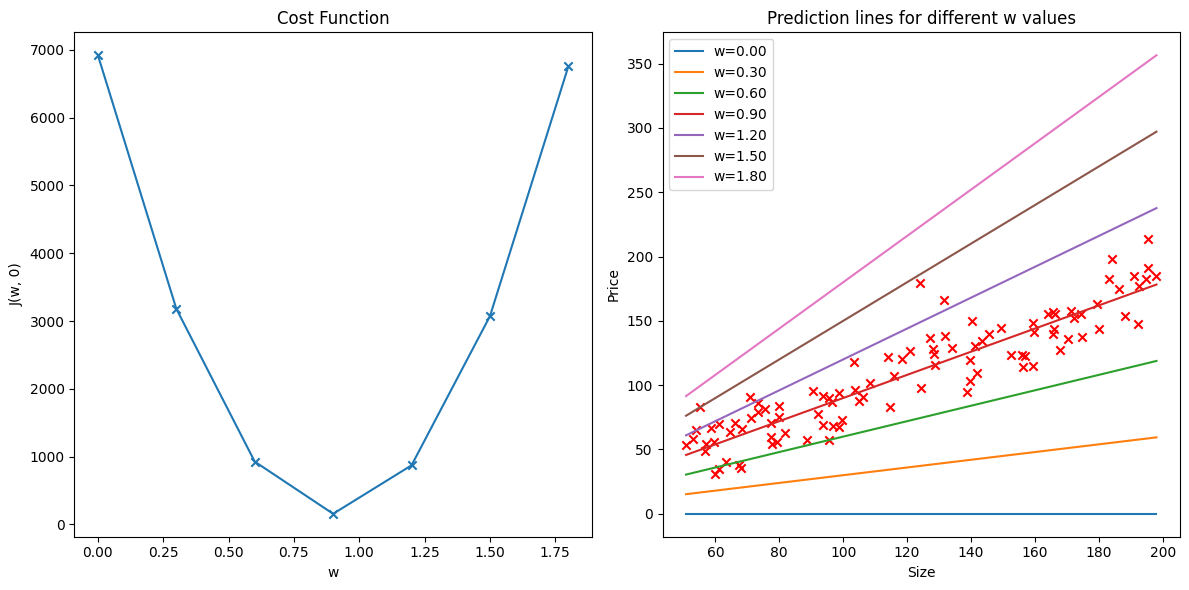

In [13]:
w_list = np.linspace(0, 1.8, 7)
cost_val_list = compute_cost(train_df['size'], train_df['price'], w_list, 0)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the cost function on the left side
ax1.plot(w_list, cost_val_list)
ax1.scatter(w_list, cost_val_list, marker='x')
ax1.set_xlabel('w')
ax1.set_ylabel('J(w, 0)')
ax1.set_title('Cost Function')

# Plot the lines for each w on the right side
x_vals = np.linspace(train_df['size'].min(), train_df['size'].max(), 100)  # Use range of your x values
for w in w_list:
    y_vals = predict(x_vals, w, 0)  # Assuming b=0
    ax2.plot(x_vals, y_vals, label=f'w={w:.2f}')

ax2.set_xlabel('Size')
ax2.set_ylabel('Price')
ax2.set_title('Prediction lines for different w values')
ax2.legend(loc='best')
ax2.scatter(train_df['size'], train_df['price'], color='red', marker='x', label='Actual Data')

# Show the plot
plt.tight_layout()
plt.show()


The cost function forms the shape of a parabola, with a single minimum point. This minimum corresponds to the value of *w* where the model performs best, resulting in the smallest error on the training data. In our case, the optimal value of *w* is approximately 0.9. As shown in the right chart, the line corresponding to w=0.9 closely follows the actual data points, providing the best prediction compared to the other lines.

Now, let's visualize how the cost function changes when we vary both $b$ and $w$.

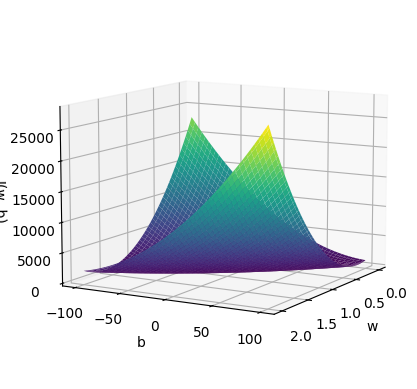

In [14]:
# Increase the number of points
ws = np.linspace(0, 2, 100)
bs = np.linspace(-100, 100, 100)

# Create meshgrid for 3D plotting
W, B = np.meshgrid(ws, bs)

# Compute cost for every pair of (w, b)
Z = np.array([[compute_cost(train_df['size'], train_df['price'], w, b) for w in ws] for b in bs])

# Plotting the 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, Z, cmap='viridis')

ax.view_init(elev=10, azim=30)  # You can tweak these values as needed

# Labeling the axes
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J(w, b)')

plt.show()

In this case, since we have two parameters, $w$ and $b$, the cost function creates a 3D surface known as a *paraboloid*. The surface illustrates how the cost changes as we adjust both $w$ and $b$, with the minimum point representing the optimal parameter values.

## Gradient Descent Algorithm<a id="gradient-descent-algorithm">

The goal of gradient descent is to find the parameters that minimize a given function. In our case, we aim to find the optimal *w* and *b* that minimize the cost function *J(w, b)*.

We seek *w* and *b* such that:

$$J(w, b) \quad \text{is minimized.}$$

**Gradient Descent Steps:**
- Begin with initial values for $w$ and $b$ (e.g., $w = 0$, $b = 0$)).
- Iteratively adjust $w$ and $b$ to reduce $J(w, b)$.
- Continue updating until the algorithm converges near the minimum.

The parameters are updated according to the following rule:

$$
\begin{align*}
\text{Repeat:} \quad &\lbrace \\
w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \\
b &= b -  \alpha \frac{\partial J(w,b)}{\partial b} \\
&\rbrace
\end{align*}
$$

Where:
- $w$ and $b$ are updated simultaneously (both gradients are calculated before updating the parameters).
- $\alpha$ is the learning rate, controlling the step size of each update.
- $\frac{\partial J(w,b)}{\partial w}$ is the partial derivative of the cost function with respect to $w$.
- $\frac{\partial J(w,b)}{\partial b}$ is the partial derivative of the cost function with respect to $b$.

The gradients (partial derivatives) are computed as follows*:

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w} &= \frac{1}{m} \sum_{i=0}^{m-1} \left(f_{w,b}(x^{(i)}) - y^{(i)}\right) x^{(i)} \tag{4} \\
\frac{\partial J(w,b)}{\partial b} &= \frac{1}{m} \sum_{i=0}^{m-1} \left(f_{w,b}(x^{(i)}) - y^{(i)}\right) \tag{5}
\end{align}
$$

Here, $m$ represents the number of training examples, $f_{w,b}(x^{(i)})$ is the prediction for the $i$-th training example, and $y^{(i)}$ is its true value.

\**The complete mathematical derivation of these gradients is provided at the end of the notebook..*

### Intuition behind Gradient Descent<a id="intuition-behind-gradient-descent">

Let's review the Gradient Descent steps one more time:

- **Initialize**: Begin with initial values for $w$ and $b$ (e.g., $w = 0$, $b = 0$)).
- **Update Iteratively**: Repeatedly adjust $w$ and $b$ to reduce the cost function $J(w, b)$. The adjustments are made by subtracting the partial derivatives of $J(w, b)$ with respect to $w$ and $b$ from the corresponding parameters, scaled by a factor called the learning rate ($\alpha$).
- **Converge**: Continue updating until the changes become small enough, meaning the algorithm has found a value near the minimum of the cost function, or the maximum number of iterations has been reached.

Mathematically, the partial derivatives of a function at a given point indicate the direction of maximal increase. By subtracting the derivatives from the parameter values, we move in the direction of steepest descent, aiming to minimize the function. The learning rate is crucial in controlling the size of each step; it determines how far we move in that direction with each update.

Consider the cost function for linear regression with only slope parameter parameter, which we analyzed earlier (*b* fixed to 0, see image below). If we initialize the gradient descent algorithm at *w = 0*, the derivative of the cost function at this point will be negative. Subtracting a negative number effectively increases *w*, moving it in the direction of minimization. The learning rate $\alpha$ controls how large this adjustment is—if $\alpha$ is too large, we risk overshooting the minimum; if it's too small, the convergence will be slow.

**Note: images from drive `images` folder referenced below**

<img src="images/gradient_descent_cost.png" style="float: left; margin-right: 10px;" />


By selecting an optimal learning rate, we can efficiently reach the minimum in a small number of steps.

Now, let’s see what happens when $\alpha$ is set too high:

<img src="images/gradient_descent_cost_high_learning_rate.png" style="float: left; margin-right: 10px;" />


### Gradient Descent Implementation<a id="gradient-descent-implementation">

We will start by defining the function which computes the gradient (partial derivatives of the cost function in respect of each model parameter - $w$ and $b$)

In [15]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradients of the cost function with respect to
    the parameters w (slope) and b (intercept).

    Args:
        x (array-like): The input feature values.
        y (array-like): The actual target values.
        w (float): The current slope of the linear regression model.
        b (float): The current intercept of the linear regression model.

    Returns:
        dw (float): The gradient with respect to the slope (w).
        db (float): The gradient with respect to the intercept (b).
    """
    m = x.shape[0]

    dw = 0
    db = 0

    for i in range(m):
        y_pred = predict(x[i], w, b)
        dw += (y_pred - y[i]) * x[i]
        db += (y_pred - y[i])

    dw = 1/m * dw
    db = 1/m * db

    return dw, db

Now, we can define gradient descent function

In [16]:
def gradient_descent(x, y, w_init, b_init, alpha, iterations=1000):
    """
    Performs gradient descent to optimize the model parameters (w and b)
    by iteratively updating them to minimize the cost function.

    Args:
        x (array-like): The input feature values.
        y (array-like): The actual target values.
        w_init (float): The initial value for the slope (w).
        b_init (float): The initial value for the intercept (b).
        alpha (float): The learning rate controlling the size of the updates.
        iterations (int, optional): The number of iterations for gradient descent.

    Returns:
        w (float): The optimized slope after gradient descent.
        b (float): The optimized intercept after gradient descent.
        J_hist (array): The history of the cost function values across iterations.
        params_hist (array): The history of the model parameters (w, b) across iterations.
    """
    w = w_init
    b = b_init

    J_hist = []
    params_hist = []

    for i in range(iterations):
        dw, db = compute_gradient(x, y, w, b)
        b = b - alpha * db
        w = w - alpha * dw

        curr_cost = compute_cost(x, y, w, b)

        J_hist.append(curr_cost)
        params_hist.append([w,b])

    return w, b, np.array(J_hist), np.array(params_hist)

In [17]:
x = train_df['size']
y = train_df['price']

# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 20
tmp_alpha = 0.000015
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x ,y, w_init, b_init, tmp_alpha,
                                                    iterations)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by gradient descent: (  0.9024,  0.0067)


### Learning curves and Model Convergence<a id="learning-curves-and-model-convergence">

Learning curves provide insight into how the model improves as it trains over time. The x-axis represents the number of iterations (training steps), while the y-axis shows the cost function $J(w,b)$, which measures the model's error.

Let’s begin by visualizing how the cost function changes with each iteration, illustrating how the model learns and minimizes errors over time:

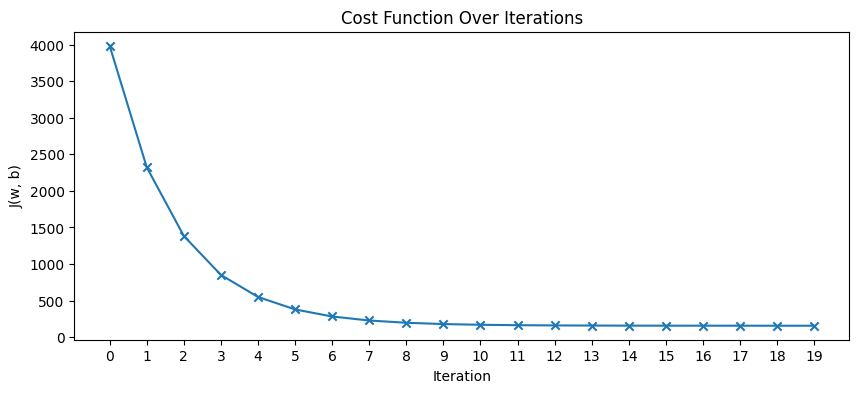

In [ ]:
x = range(len(J_hist))
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, c)
ax.scatter(x, J_hist, marker='x')

ax.set_xlabel("Iteration")
ax.set_ylabel("J(w, b)")
ax.set_title("Cost Function Over Iterations")

ax.set_xticks(range(len(J_hist)))

plt.show()

In this plot, the cost function decreases as the number of iterations increases, showing that the model is gradually reducing the error and improving its predictions.

Next, let's examine how the model parameters, $w$ (slope) and
$b$ (intercept), evolve during training:

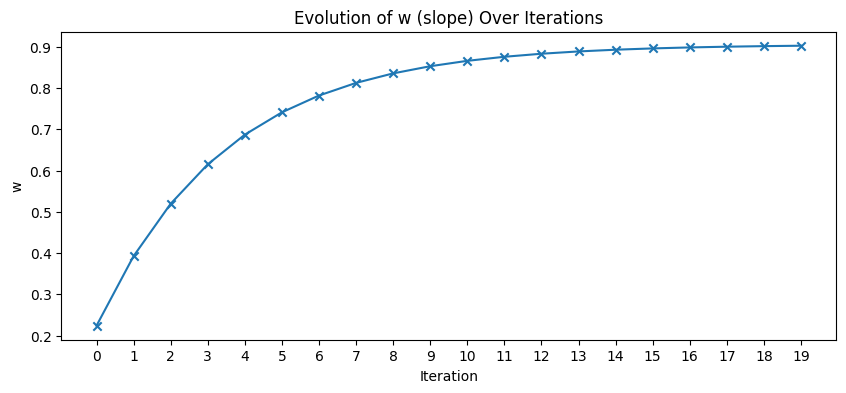

In [19]:
fig, ax = plt.subplots(figsize=(10, 4))
x = np.arange(len(p_hist[:, 0]))
ax.plot(x, p_hist[:, 0])
ax.scatter(x, p_hist[:, 0], marker='x')
ax.set_xlabel("Iteration")
ax.set_ylabel("w")
ax.set_title("Evolution of w (slope) Over Iterations")
ax.set_xticks(range(p_hist.shape[0]))
plt.show()

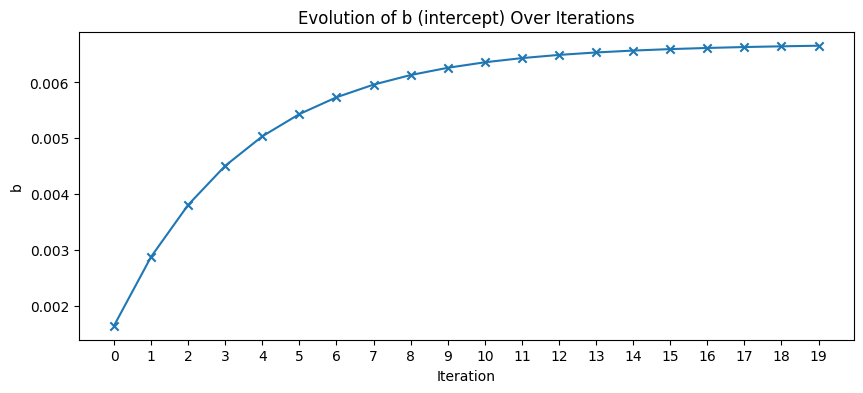

In [20]:
fig, ax = plt.subplots(figsize=(10, 4))
x = np.arange(len(p_hist[:, 1]))
ax.plot(x, p_hist[:, 1])
ax.scatter(x, p_hist[:, 1], marker='x')
ax.set_xlabel("Iteration")
ax.set_ylabel("b")
ax.set_title("Evolution of b (intercept) Over Iterations")
ax.set_xticks(range(p_hist.shape[0]))
plt.show()

These plots illustrate how the parameters $w$ and $b$ change and converge as the model learns. Over time, both parameters stabilize as the model reaches its optimal configuration, producing better predictions.

Once the parameters converge, the model is considered trained, having learned the best fit for the data.

By analyzing these learning curves, we can evaluate how efficiently the model reaches convergence and determine if changes to the learning rate or the number of iterations are necessary for faster or more effective training.

## Making Predictions<a id="making-predictions">

Once the model has been trained, we can start making predictions. To make predictions we can call *predict* function that we defined earlier with the final model parameters learned during gradiend descent optimization.

Let's say we want to determine the price of the house if it's size is 155 m^2:

In [21]:
size = 155
pred_price = predict(size, w_final, b_final)

print(f"Predicted house price for size={size} m2 is {pred_price:.02f}K$")

Predicted house price for size=155 m2 is 139.88K$


## Model Evaluation<a id="model-evaluation">

After we have trained the model, it's important to evaluate its performance on data it hasn't seen during training. This helps us understand how well the model can generalize to new, unseen data, rather than just fitting the training data.

One common metric for evaluating regression models is **Root Mean Squared Error (RMSE)**, which is the square root of the average squared difference between the predicted values and the actual values. A lower RMSE indicates better model performance, as the predictions are closer to the true values. RMSE is calculated as:

$$
\text{RMSE} = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} - \hat{y}^{(i)} \right)^2}
$$

Where:
- $m$ is the number of examples in the validation set.
- $y^{(i)}$ is the true value for the \( i \)-th example.
- $\hat{y}^{(i)}$ is the predicted value for the \( i \)-th example.

The RMSE provides a more interpretable error value by bringing the units back to the original scale of the target variable. This allows us to better understand how far off the predictions are on average in terms of the actual values.

By evaluating the model on the validation set, we can gain insight into its ability to make accurate predictions on new data, and whether further tuning or adjustments are necessary to improve performance.

In [22]:
def rmse(y_true, y_pred):
    """
    Computes the Root Mean Squared Error (RMSE) between the true values
    and the predicted values.

    Args:
        y_true (array-like): The actual target values.
        y_pred (array-like): The predicted target values by the model.

    Returns:
        float: The root mean squared error, which measures the average magnitude of the prediction errors.
    """
    total_error = 0
    n = len(y_true)

    for i in range(n):
        error = y_true[i] - y_pred[i]
        total_error += error ** 2

    mean_squared_error = total_error / n

    return mean_squared_error ** 0.5

In [23]:
y_val_pred = predict(val_df['size'], w_final, b_final)
rmse(val_df['price'], y_val_pred)

np.float64(20.052666205348608)

### Normal Equation for Univariate Linear Regression<a id="normal-equation-for-univariate-linear-regression">

An alternative to using gradient descent for finding the optimal parameters in linear regression is the Normal Equation. This method directly calculates the best-fit parameters
$w$ and $b$ (slope and intercept) using a closed-form solution, without the need for iterative optimization.

Mathematically, the slope $w$ and intercept $b$ are calculated as follows:

$$
w = \frac{\sum_{i=1}^{m} (x^{(i)} - \bar{x}) (y^{(i)} - \bar{y})}{\sum_{i=1}^{m} (x^{(i)} - \bar{x})^2}
$$

$$
b = \bar{y} - w \cdot \bar{x}
$$

Where:
- $\bar{x}$ is the mean of the feature values $x$ (e.g., house sizes),
- $\bar{y}$ is the mean of the target values $y$ (e.g., house prices),
- $m$ is the total number of data points.

This formula computes the slope $w$ by measuring the covariance between $x$ and $y$, normalized by the variance of $x$. The intercept $b$ is then determined by adjusting the target mean $\bar{y}$ using the slope and the feature mean $\bar{x}$.

#### Advantages:
- **Only for Linear Regression**: The Normal Equation works specifically for linear regression problems where the relationship between input features and the target is linear.
- **Finds optimal $w$ and $b$ without Iterations**: Instead of iteratively updating parameters like in gradient descent, the Normal Equation provides a direct formula to determine $w$ and $b$, making it easy to compute for smaller datasets.

#### Disadvantages:
- **Doesn't Generalize to Other Algorithms**: The Normal Equation is limited to linear regression and does not generalize to more complex machine learning models like logistic regression, neural networks, or non-linear algorithms.
- **Slow for High-Dimensional Data**: When the number of features is large (e.g., more than 10,000), solving the Normal Equation becomes computationally expensive because.

For most practical purposes, **gradient descent** is the recommended method for finding the parameters $w$ and $b$, especially when the dataset has a large number of features or needs to be extended to other types of machine learning models.

Below you can find the implementation of the Normal Equation function for univariate linear regression:

In [24]:
def normal_equation_lr(x, y):
    """
    Computes the slope (w) and intercept (b) of the linear regression line using the normal equation
    without vectorized operations.

    Args:
        x (list or array-like): List of input feature values.
        y (list or array-like): List of actual target values.

    Returns:
        tuple: Values of w (slope) and b (intercept).
    """
    # Calculate means
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Initialize numerator and denominator
    numerator = 0
    denominator = 0

    # Loop through the data points
    for i in range(len(x)):
        numerator += (x[i] - x_mean) * (y[i] - y_mean)
        denominator += (x[i] - x_mean) ** 2

    # Calculate slope and intercept
    w = numerator / denominator
    b = y_mean - w * x_mean

    return w, b


In [25]:
normal_equation_lr(train_df['size'], train_df['price'])

(np.float64(0.892130448206159), np.float64(1.830327969914137))

The slope $w$ is approximately 0.89, and the intercept $b$ is approximately 1.83. These values represent the optimal parameters for the linear regression model, providing the best fit to the data without requiring iterative methods like gradient descent.

## Additional information (optional, requires background in Calculus):

### Derivation of $ \frac{\partial J(w,b)}{\partial w} $:

We start with the cost function:

$$
J(w, b) = \frac{1}{2m} \sum_{i=0}^{m-1} \left( w x^{(i)} + b - y^{(i)} \right)^2
$$

Now, take the derivative of $ J(w, b) $ with respect to $ w $:

$$
\frac{\partial J(w,b)}{\partial w} = \frac{\partial}{\partial w} \left( \frac{1}{2m} \sum_{i=0}^{m-1} \left( w x^{(i)} + b - y^{(i)} \right)^2 \right)
$$

Since the derivative of a sum is the sum of derivatives, we focus on differentiating the expression inside the summation:

$$
\frac{\partial}{\partial w} \left( \frac{1}{2m} \sum_{i=0}^{m-1} \left( w x^{(i)} + b - y^{(i)} \right)^2 \right) = \frac{1}{2m} \sum_{i=0}^{m-1} \frac{\partial}{\partial w} \left( \left( w x^{(i)} + b - y^{(i)} \right)^2 \right)
$$

Now apply the chain rule. The derivative of $ (z)^2 $ with respect to $ z $ is $ 2z $, where $ z = w x^{(i)} + b - y^{(i)} $:

$$
= \frac{1}{2m} \sum_{i=0}^{m-1} 2 \left( w x^{(i)} + b - y^{(i)} \right) \cdot \frac{\partial}{\partial w} \left( w x^{(i)} + b - y^{(i)} \right)
$$

Since the derivative of $ w x^{(i)} $ with respect to $ w $ is $ x^{(i)} $ (and the derivative of the constant $ b $ is 0):

$$
= \frac{1}{2m} \sum_{i=0}^{m-1} 2 \left( w x^{(i)} + b - y^{(i)} \right) \cdot x^{(i)}
$$

Now simplify the factor of 2:

$$
= \frac{1}{m} \sum_{i=0}^{m-1} \left( w x^{(i)} + b - y^{(i)} \right) \cdot x^{(i)}
$$

Finally, recognizing that $ w x^{(i)} + b = f_{w,b}(x^{(i)}) $, the prediction for the $i$-th training example, we get:

$$
\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right) x^{(i)}
$$

---

### Derivation of $ \frac{\partial J(w,b)}{\partial b} $:

Again, start with the cost function:

$$
J(w, b) = \frac{1}{2m} \sum_{i=0}^{m-1} \left( w x^{(i)} + b - y^{(i)} \right)^2
$$

Now, take the derivative of $ J(w, b) $ with respect to $ b $:

$$
\frac{\partial J(w,b)}{\partial b} = \frac{\partial}{\partial b} \left( \frac{1}{2m} \sum_{i=0}^{m-1} \left( w x^{(i)} + b - y^{(i)} \right)^2 \right)
$$

Once again, apply the chain rule. The derivative of $ (z)^2 $ with respect to $ z $ is $ 2z $, where $ z = w x^{(i)} + b - y^{(i)} $:

$$
= \frac{1}{2m} \sum_{i=0}^{m-1} 2 \left( w x^{(i)} + b - y^{(i)} \right) \cdot \frac{\partial}{\partial b} \left( w x^{(i)} + b - y^{(i)} \right)
$$

Now, since the derivative of $ w x^{(i)} + b $ with respect to $ b $ is 1 (because $ w x^{(i)} $ is constant with respect to $ b $):

$$
= \frac{1}{2m} \sum_{i=0}^{m-1} 2 \left( w x^{(i)} + b - y^{(i)} \right)
$$

Simplify the factor of 2:

$$
= \frac{1}{m} \sum_{i=0}^{m-1} \left( w x^{(i)} + b - y^{(i)} \right)
$$

Finally, recognizing that $ w x^{(i)} + b = f_{w,b}(x^{(i)}) $, we get:

$$
\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)
$$

This completes the derivation of both partial derivatives.